In [1]:
import os

# Овчинников Даниэль

## Масштабирование

источник: https://datafinder.ru/products/masshtabirovanie-funkciy-v-mashinnom-obuchenii

**Масштабированием** называется общий процесс изменения диапазона признака. Это необходимый шаг, потому что признаки измеряются в разных единицах, а значит покрывают разные диапазоны. Это сильно искажает результаты таких алгоритмов, как метод опорных векторов и метод k-ближайших соседей, которые учитывают расстояния между измерениями. А масштабирование позволяет этого избежать. И хотя методы вроде линейной регрессии и «случайного леса» не требует масштабирования признаков, лучше не пренебрегать этим этапом при сравнении нескольких алгоритмов.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from numpy import mean, std
from pandas import read_csv, DataFrame
from sklearn.preprocessing import MinMaxScaler

columns_names = ['символизация',
 'нормализованные потери',
 'марка',
 'вид топлива',
 'стремление',
 'количество дверей',
 'тип кузова',
 'ведущий мост',
 'расположение двигателя',
 'колесная база',
 'длина',
 'ширина',
 'высота',
 'снаряженная масса',
 'тип двигателя',
 'количество цилиндров',
 'объем двигателя',
 'топливная система',
 'диаметр отверстия',
 'ход',
 'степень сжатия',
 'мощность двигателя',
 'пиковые обороты',
 'городской режим',
 'шоссейный режим',
 'цена']
data = pd.read_csv(os.getcwd()+"\\Autos_Full.csv", header=0, names=columns_names)
data

,символизация,нормализованные потери,марка,вид топлива,стремление,количество дверей,тип кузова,ведущий мост,расположение двигателя,колесная база,...,объем двигателя,топливная система,диаметр отверстия,ход,степень сжатия,мощность двигателя,пиковые обороты,городской режим,шоссейный режим,цена
0,1.782215,-0.206203,alfa-romero,gas,std,two,convertible,rwd,front,-1.678015,...,0.045098,mpfi,3.47,2.68,-0.287525,111,5000,-0.677292,-0.555613,0.025958
1,1.782215,-0.206203,alfa-romero,gas,std,two,convertible,rwd,front,-1.678015,...,0.045098,mpfi,3.47,2.68,-0.287525,111,5000,-0.677292,-0.555613,0.397446
2,0.163544,-0.206203,alfa-romero,gas,std,two,hatchback,rwd,front,-0.719041,...,0.574066,mpfi,2.68,3.47,-0.287525,154,5000,-0.990387,-0.702307,0.397446
3,0.972880,1.363521,audi,gas,std,four,sedan,fwd,front,0.142410,...,-0.459826,mpfi,3.19,3.40,-0.036110,102,5500,-0.207649,-0.115531,0.082206
4,0.972880,1.363521,audi,gas,std,four,sedan,4wd,front,0.077395,...,0.189362,mpfi,3.19,3.40,-0.538940,115,5500,-1.146935,-1.289083,0.514888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,-1.455126,-0.760223,volvo,gas,std,four,sedan,rwd,front,1.654013,...,0.309582,mpfi,3.78,3.15,-0.161817,114,5400,-0.364197,-0.408919,0.440096
181,-1.455126,-0.760223,volvo,gas,turbo,four,sedan,rwd,front,1.654013,...,0.309582,mpfi,3.78,3.15,-0.362949,160,5300,-0.990387,-0.849001,0.712068
182,-1.455126,-0.760223,volvo,gas,std,four,sedan,rwd,front,1.654013,...,1.078989,mpfi,3.58,2.87,-0.337808,134,5500,-1.146935,-1.142389,1.013709
183,-1.455126,-0.760223,volvo,diesel,turbo,four,sedan,rwd,front,1.654013,...,0.405758,idi,3.01,3.40,3.232282,106,4800,0.105447,-0.555613,1.135478


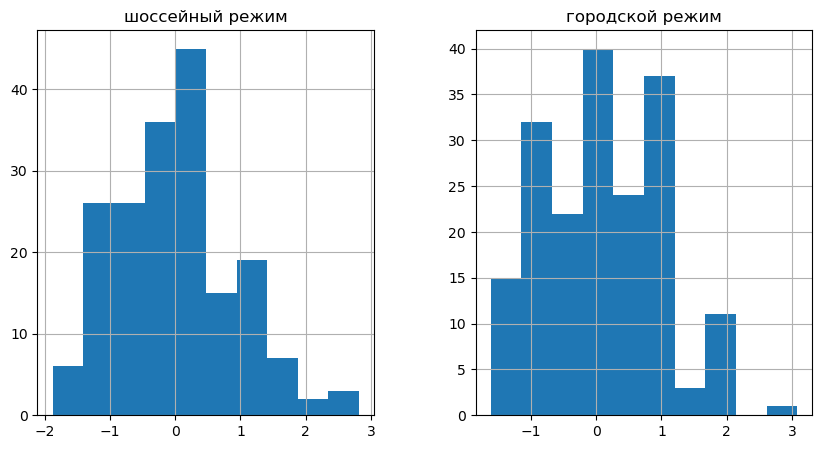

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)

dataset = data[['шоссейный режим','городской режим']].copy()
dataset.hist()
pyplot.show()

Масштабировать будем с помощью приведения каждого признака к диапазону от 0 до 1.

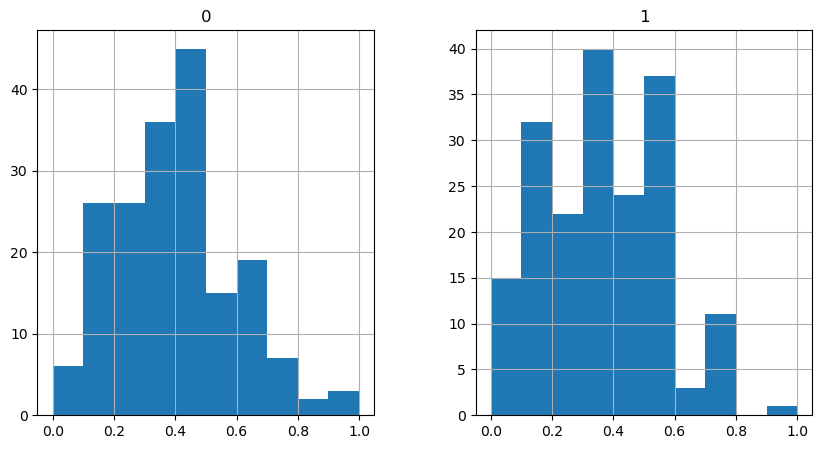

In [4]:
datta = dataset.values[:, :]
trans = MinMaxScaler()
datta = trans.fit_transform(datta)
datus = pd.DataFrame(datta)

plt.rcParams["figure.figsize"] = (10, 5)

datus.hist()
pyplot.show()

![picture2](./2.png)

как мы видим значения теперь находятся в диапозоне от 0 до 1, но форма графиков осалась прежней

## Ранговая корреляция Кендалла

Корреляция относится к ассоциации между наблюдаемыми значениями двух переменных.

Переменные могут иметь положительную связь, что означает, что при увеличении значений для одной переменной значения другой переменной также увеличиваются. Ассоциация также может быть отрицательной, что означает, что при увеличении значений одной переменной значения других уменьшаются. Наконец, ассоциация может быть нейтральной, что означает, что переменные не связаны.

Корреляция количественно определяет эту связь, часто в качестве меры между значениями от -1 до 1 для совершенно отрицательно и совершенно положительно коррелированных. Рассчитанная корреляция называется «коэффициент корреляции. »Этот коэффициент корреляции затем можно интерпретировать для описания мер.

In [5]:
from numpy.random import rand
from numpy.random import seed
from scipy.stats import kendalltau

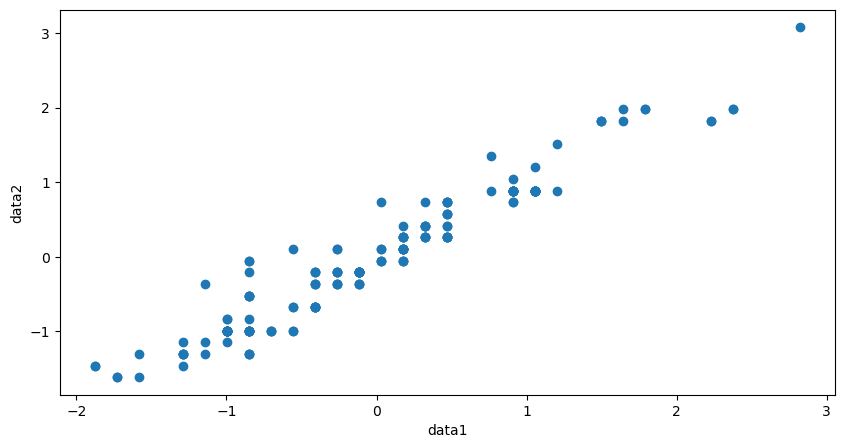

In [6]:
data1 = data['шоссейный режим'].copy()
data2 = data['городской режим'].copy()
pyplot.scatter(data1,data2)
pyplot.xlabel("data1")
pyplot.ylabel("data2")
pyplot.show()

Мы можем ясно видеть, что переменные имеют равномерное распределение, и положительная ассоциация между переменными видна по диагональной группировке точек от левого нижнего до правого верхнего угла графика.

In [7]:
coef, p = kendalltau(data1,data2)
print(coef, ' ', p)

0.8893613927343336   5.729318639295274e-64


Чем выше значение coef тем сильнее корреляция. Близость значения p к нулю означает, что свзь действительно есть и можно отбросить нулевую гипотезу.

## Логистическая регрессия как линейный классификатор 

источник : https://python-school.ru/blog/logisticregression/

<b>Логистическая регрессия</b> — <i>это метод, который мы можем использовать для подбора модели регрессии, когда переменная ответа является двоичной.</i>
По своей сути логистическая регрессия просто берет уравнение линейной регрессии и использует его как параметр сигмовидной функции. Математически это выражается следующим образом: [

![picture1](./1.png)

In [8]:
from sklearn. model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils
from array import array
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

In [9]:
columns_names = ['символизация',
 'нормализованные потери',
 'марка',
 'вид топлива',
 'стремление',
 'количество дверей',
 'тип кузова',
 'ведущий мост',
 'расположение двигателя',
 'колесная база',
 'длина',
 'ширина',
 'высота',
 'снаряженная масса',
 'тип двигателя',
 'количество цилиндров',
 'объем двигателя',
 'топливная система',
 'диаметр отверстия',
 'ход',
 'степень сжатия',
 'мощность двигателя',
 'пиковые обороты',
 'городской режим',
 'шоссейный режим',
 'цена']
data = pd.read_csv(os.getcwd()+"\\Autos_Full.csv", header=0, names=columns_names)
data

,символизация,нормализованные потери,марка,вид топлива,стремление,количество дверей,тип кузова,ведущий мост,расположение двигателя,колесная база,...,объем двигателя,топливная система,диаметр отверстия,ход,степень сжатия,мощность двигателя,пиковые обороты,городской режим,шоссейный режим,цена
0,1.782215,-0.206203,alfa-romero,gas,std,two,convertible,rwd,front,-1.678015,...,0.045098,mpfi,3.47,2.68,-0.287525,111,5000,-0.677292,-0.555613,0.025958
1,1.782215,-0.206203,alfa-romero,gas,std,two,convertible,rwd,front,-1.678015,...,0.045098,mpfi,3.47,2.68,-0.287525,111,5000,-0.677292,-0.555613,0.397446
2,0.163544,-0.206203,alfa-romero,gas,std,two,hatchback,rwd,front,-0.719041,...,0.574066,mpfi,2.68,3.47,-0.287525,154,5000,-0.990387,-0.702307,0.397446
3,0.972880,1.363521,audi,gas,std,four,sedan,fwd,front,0.142410,...,-0.459826,mpfi,3.19,3.40,-0.036110,102,5500,-0.207649,-0.115531,0.082206
4,0.972880,1.363521,audi,gas,std,four,sedan,4wd,front,0.077395,...,0.189362,mpfi,3.19,3.40,-0.538940,115,5500,-1.146935,-1.289083,0.514888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,-1.455126,-0.760223,volvo,gas,std,four,sedan,rwd,front,1.654013,...,0.309582,mpfi,3.78,3.15,-0.161817,114,5400,-0.364197,-0.408919,0.440096
181,-1.455126,-0.760223,volvo,gas,turbo,four,sedan,rwd,front,1.654013,...,0.309582,mpfi,3.78,3.15,-0.362949,160,5300,-0.990387,-0.849001,0.712068
182,-1.455126,-0.760223,volvo,gas,std,four,sedan,rwd,front,1.654013,...,1.078989,mpfi,3.58,2.87,-0.337808,134,5500,-1.146935,-1.142389,1.013709
183,-1.455126,-0.760223,volvo,diesel,turbo,four,sedan,rwd,front,1.654013,...,0.405758,idi,3.01,3.40,3.232282,106,4800,0.105447,-0.555613,1.135478


Создаём обучающую и тестовую выборки:

In [10]:
X = data[['колесная база',
 'длина',
 'ширина',
 'высота',
 'снаряженная масса',
 'объем двигателя']]

y = data['количество дверей']
#lab = preprocessing.LabelEncoder()
#y_transformed = lab.fit_transform(y)

In [11]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.3,random_state=0)

Далее мы будем использовать функцию LogisticRegression() , чтобы подогнать модель логистической регрессии к набору данных :

In [12]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression. fit (X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression. predict (X_test)

Диагностика модели:

In [13]:
cnf_matrix = metrics. confusion_matrix (y_test, y_pred)
cnf_matrix

array([[31,  1],
       [ 9, 15]], dtype=int64)

Истинно положительных предсказаний: 31 Истинно отрицательные прогнозы: 15 Ложноположительные прогнозы: 9 Ложноотрицательные прогнозы: 1

In [14]:
print(" Accuracy:",metrics. accuracy_score (y_test, y_pred))

 Accuracy: 0.8214285714285714


Это говорит нам о том, что модель сделала правильный прогноз в 82,1% случаев.

Наконец, мы можем построить кривую ROC (рабочая характеристика приемника), которая отображает процент истинных положительных результатов, предсказанных моделью, поскольку отсечка вероятности прогнозирования снижается с 1 до 0.


Наконец, мы можем построить кривую ROC (рабочая характеристика приемника), которая отображает процент истинных положительных результатов, предсказанных моделью, поскольку отсечка вероятности прогнозирования снижается с 1 до 0. 

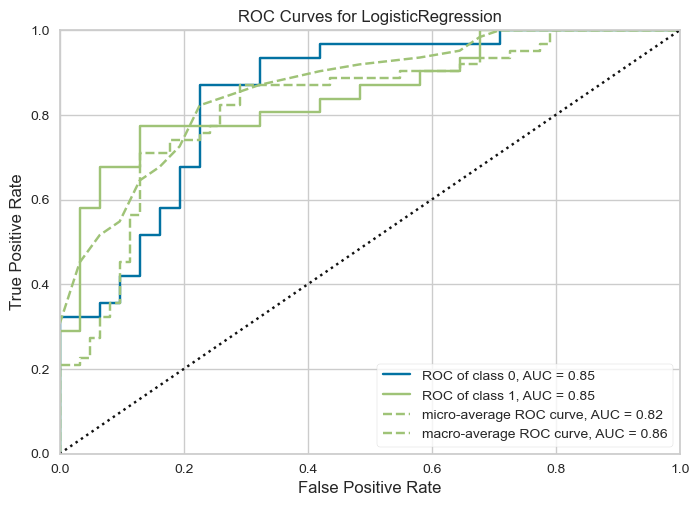

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [15]:
model = LogisticRegression()

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)      
visualizer.show()

ROC-кривые не всегда являются оптимальным способом оценки классификатора. Если классы не сбалансированы (один класс имеет гораздо больше наблюдений по сравнению с другим), результаты ROC-кривой могут ввести в заблуждение.

Кривая “точность-полнота” часто является идеальным выбором в таких ситуациях.
Вспомним, что подразумевается под терминами “точность” (precision) и “полнота” (recall).
Точность дает представление о том, насколько хорошо модель правильно определяет положительный класс. Другими словами, сколько из всех предсказаний для положительного класса были правильными.
Полнота позволяет судить о том, насколько хорошо модель правильно предсказывает все положительные наблюдения в наборе данных.
Обычно достигается компромисс между точностью и полнотой. Например, можно увеличить точность за счет уменьшения полноты.
Кривая “точность-полнота” отражает этот компромисс при различных порогах классификации.

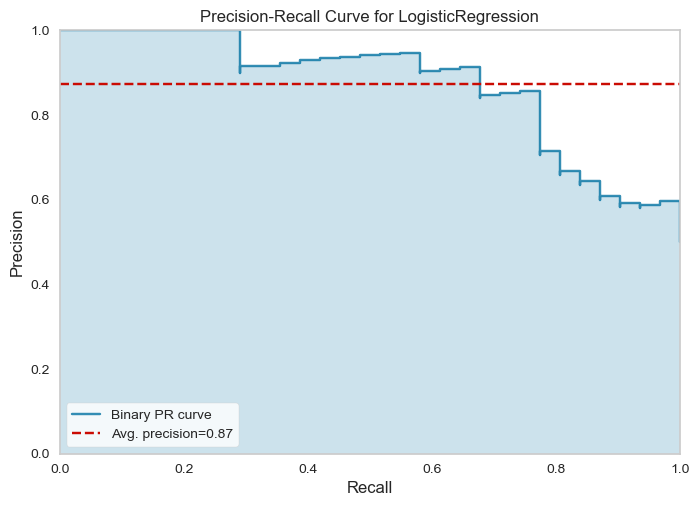

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [16]:
viz = PrecisionRecallCurve(LogisticRegression(random_state=42))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

Реализуем цикл обучения логистической регрессии используя Python. В этом нам снова поможет PyTorch. Для начала импортируем все библиотеки которые нам в этом пригодятся:

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

Далее напишем класс реализующий логистическую регрессию. Прошу обратить внимание, что от линейной регрессии, которую мы реализовывали в ряде предыдущих статей, отличает лишь применение сигмоиды и новый метод predict (так как теперь мы решаем задачу классификации). 

In [18]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(input_size, 1))
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = x @ self.weights
        x = self.sigmoid(x)
        return x
    def fit(self, X, y, lr=0.01, num_iterations=1000):
        X = torch.from_numpy(X).float()
        y = torch.from_numpy(y).float().view(-1, 1) 
        # Инициализируем функцию потерь и оптимизатор
        criterion = nn.BCELoss()
        optimizer = optim.SGD(self.parameters(), lr=lr)
        for epoch in range(num_iterations):
            # Зануляем градиенты
            optimizer.zero_grad()
            # Получаем предсказания модели и вычисляем функцию потерь
            y_pred = self(X)
            loss = criterion(y_pred, y)
            # Обновляем веса
            loss.backward()
            optimizer.step()
            
    def predict(self, X):
        X = torch.from_numpy(X).float()
        # Получаем предсказания модели и присваиваем метки классов на основе вероятности
        y_pred = self(X)
        y_pred_labels = [1 if i > 0.5 else 0 for i in y_pred.detach().numpy().flatten()]
        return y_pred_labels

обучим нашу модель и оценим её качество: 

In [19]:
X = X.to_numpy()
model = LogisticRegression(X.shape[1])
model.fit(X, y, lr=0.1, num_iterations=100)
# Прогнозируем метки классов на тестовой выборке
y_pred = model.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74       111
           1       0.62      0.86      0.72        74

    accuracy                           0.73       185
   macro avg       0.75      0.75      0.73       185
weighted avg       0.77      0.73      0.73       185



## Реализация дерева решений

источник: https://python-school.ru/blog/decisiontreeclassifier/

In [20]:
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import graphviz

Конечная реализация Decision Tree зависит от конкретной задачи классификации, поэтому я предоставлю основной каркас, который можно использовать для построения различных моделей деревьев решений. 

In [21]:
class Node:
    def __init__(self, feature_idx=None, threshold=None, left=None, right=None, value=None):
        self.feature_idx = feature_idx    # индекс признака, по которому разбивается вершина
        self.threshold = threshold        # пороговое значение, по которому разбивается вершина
        self.left = left                  # левое поддерево
        self.right = right                # правое поддерево
        self.value = value                # значение в листовой вершине
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split   # минимальное количество выборок, необходимых для разделения вершины
        self.max_depth = max_depth                   # максимальная глубина дерева
        self.n_feats = n_feats                       # количество признаков, используемых для разделения вершин
        self.root = None
    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))
        # Проверяем условие остановки рекурсии
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)
        # Ищем лучшее разделение признака
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        # Разделяем данные и делаем рекурсивный вызов для левого и правого поддеревьев
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        # Возвращаем новую вершину дерева
        return Node(best_feat, best_thresh, left, right)
    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold
        return split_idx, split_thresh
    def _information_gain(self, y, X_column, split_thresh):
        # Вычисляем энтропию перед разбиением
        parent_entropy = self._entropy(y)
        # Разделяем выборки по пороговому значению
        left_idxs, right_idxs = self._split(X_column, split_thresh)
        # Если разделение не привело к изменению выборок, возвращаем нулевой информационный прирост
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        # Вычисляем энтропию после разбиения
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r
        # Вычисляем информационный прирост
        ig = parent_entropy - child_entropy
        return ig
    def _entropy(self, y):
        # Вычисляем энтропию выборки
        _, counts = np.unique(y, return_counts=True)
        probs = counts / len(y)
        entropy = -np.sum(probs * np.log2(probs))
        return entropy
    def _split(self, X_column, split_thresh):
        # Разделяем выборки по пороговому значению
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs
    def _most_common_label(self, y):
        # Возвращает наиболее часто встречающееся значение в выборке
        _, counts = np.unique(y, return_counts=True)
        return max(zip(_, counts), key=lambda x: x[1])[0]
    def predict(self, X):
        # Прогнозируем метки для новых данных
        return np.array([self._traverse_tree(x, self.root) for x in X])
    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_idx] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)
    def visualize_tree(self):
        # Создаем объект `Digraph` из библиотеки graphviz
        dot = graphviz.Digraph()
        # Внутренняя функция `add_nodes` для рекурсивного добавления узлов дерева
        def add_nodes(node):
            # Если узел содержит значение (лист), добавляем его значение в качестве меткиы
            # Иначе добавляем условие разбиения (порог и номер признака)
            if node.value is not None:
                label = str(node.value)
            else:
                label = "X[" + str(node.feature_idx) + "] <= " + str(node.threshold)
            # Добавляем узел в объект `Digraph`
            dot.node(str(id(node)), label)
            # Если у узла есть левый потомок, добавляем ребро и вызываем `add_nodes` для левого потомка
            if node.left is not None:
                dot.edge(str(id(node)), str(id(node.left)))
                add_nodes(node.left)
            # Если у узла есть правый потомок, добавляем ребро и вызываем `add_nodes` для правого потомка
            if node.right is not None:
                dot.edge(str(id(node)), str(id(node.right)))
                add_nodes(node.right)
        # Вызываем `add_nodes` для корневого узла дерева
        add_nodes(self.root)
        # Возвращаем объект `Digraph`
        return dot

Этот код представляет собой реализацию алгоритма дерева решений для классификации. Основным классом является DecisionTree, а узлы дерева представлены классом Node.
Метод init класса DecisionTree инициализирует минимальное количество образцов, необходимых для разделения узла (min_samples_split), максимальную глубину дерева (max_depth), количество признаков для рассмотрения при поиске лучшего разделения (n_feats) и корень дерева (root).
Метод fit класса DecisionTree обучает дерево на входных данных, выращивая дерево рекурсивно с помощью метода _grow_tree.
Метод _grow_tree выполняет следующие шаги рекурсивно:
1. Он проверяет, достигнута ли максимальная глубина, есть ли только один метка в данных или количество образцов меньше минимального, необходимого для разделения (min_samples_split). Если хотя бы одно из этих условий выполнено, создается листовой узел с наиболее распространенной меткой данных и возвращается. 
2. Выбирается подмножество признаков случайным образом, и лучший признак и порог находятся с помощью метода _best_criteria. 
3. Данные разделяются с использованием лучшего признака и порога, и рекурсивно вызывается метод _grow_tree для левого и правого подмножеств. 
4. Создается новый узел с лучшим признаком, порогом, левым и правым узлами и возвращается. 
Метод _best_criteria ищет лучший признак и порог, перебирая выбранные признаки и пороги и вычисляя информационный выигрыш для каждой комбинации. Возвращаются признак и порог, которые дают наибольший прирост информации.
Метод _information_gain вычисляет информационный выигрыш при разделении с использованием заданного признака и порога. Сначала вычисляется энтропия данных до разделения (parent_entropy). Затем данные разделяются с использованием порога, и вычисляется энтропия данных после разделения (child_entropy). Информационный выигрыш — это мера, которая используется для оценки того, насколько хорошо разделение данных по определенному признаку уменьшает неопределенность в классификации. Информационный выигрыш вычисляется как разница между энтропией до и после разделения данных.

етод _entropy вычисляет энтропию набора данных.
Метод visualize_tree использует рекурсию для обхода узлов дерева и добавляет их в объект Digraph из библиотеки graphviz. Для каждого узла определяется метка, которая представляет собой значение узла (для листьев) или условие разбиения (для узлов-решений). Затем для каждого узла добавляются соответствующие ребра к его потомкам, и рекурсивно вызывается функция add_nodes для каждого потомка. В результате мы получаем визуализацию дерева в виде графа.
Теперь давайте обучим наше дерево решений и оценим его качество, а так же визуализируем его: 

In [22]:
columns_names = ['символизация',
 'нормализованные потери',
 'марка',
 'вид топлива',
 'стремление',
 'количество дверей',
 'тип кузова',
 'ведущий мост',
 'расположение двигателя',
 'колесная база',
 'длина',
 'ширина',
 'высота',
 'снаряженная масса',
 'тип двигателя',
 'количество цилиндров',
 'объем двигателя',
 'топливная система',
 'диаметр отверстия',
 'ход',
 'степень сжатия',
 'мощность двигателя',
 'пиковые обороты',
 'городской режим',
 'шоссейный режим',
 'цена']
data = pd.read_csv(os.getcwd()+"\\Autos_Full.csv", header=0, names=columns_names)
data

,символизация,нормализованные потери,марка,вид топлива,стремление,количество дверей,тип кузова,ведущий мост,расположение двигателя,колесная база,...,объем двигателя,топливная система,диаметр отверстия,ход,степень сжатия,мощность двигателя,пиковые обороты,городской режим,шоссейный режим,цена
0,1.782215,-0.206203,alfa-romero,gas,std,two,convertible,rwd,front,-1.678015,...,0.045098,mpfi,3.47,2.68,-0.287525,111,5000,-0.677292,-0.555613,0.025958
1,1.782215,-0.206203,alfa-romero,gas,std,two,convertible,rwd,front,-1.678015,...,0.045098,mpfi,3.47,2.68,-0.287525,111,5000,-0.677292,-0.555613,0.397446
2,0.163544,-0.206203,alfa-romero,gas,std,two,hatchback,rwd,front,-0.719041,...,0.574066,mpfi,2.68,3.47,-0.287525,154,5000,-0.990387,-0.702307,0.397446
3,0.972880,1.363521,audi,gas,std,four,sedan,fwd,front,0.142410,...,-0.459826,mpfi,3.19,3.40,-0.036110,102,5500,-0.207649,-0.115531,0.082206
4,0.972880,1.363521,audi,gas,std,four,sedan,4wd,front,0.077395,...,0.189362,mpfi,3.19,3.40,-0.538940,115,5500,-1.146935,-1.289083,0.514888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,-1.455126,-0.760223,volvo,gas,std,four,sedan,rwd,front,1.654013,...,0.309582,mpfi,3.78,3.15,-0.161817,114,5400,-0.364197,-0.408919,0.440096
181,-1.455126,-0.760223,volvo,gas,turbo,four,sedan,rwd,front,1.654013,...,0.309582,mpfi,3.78,3.15,-0.362949,160,5300,-0.990387,-0.849001,0.712068
182,-1.455126,-0.760223,volvo,gas,std,four,sedan,rwd,front,1.654013,...,1.078989,mpfi,3.58,2.87,-0.337808,134,5500,-1.146935,-1.142389,1.013709
183,-1.455126,-0.760223,volvo,diesel,turbo,four,sedan,rwd,front,1.654013,...,0.405758,idi,3.01,3.40,3.232282,106,4800,0.105447,-0.555613,1.135478


In [23]:
X = data[[
 'длина',
 'ширина']]

y = data['количество дверей']

In [24]:
X = X.to_numpy()

In [25]:
y = y.to_numpy()

              precision    recall  f1-score   support

        four       0.73      0.91      0.81       111
         two       0.79      0.50      0.61        74

    accuracy                           0.75       185
   macro avg       0.76      0.70      0.71       185
weighted avg       0.75      0.75      0.73       185



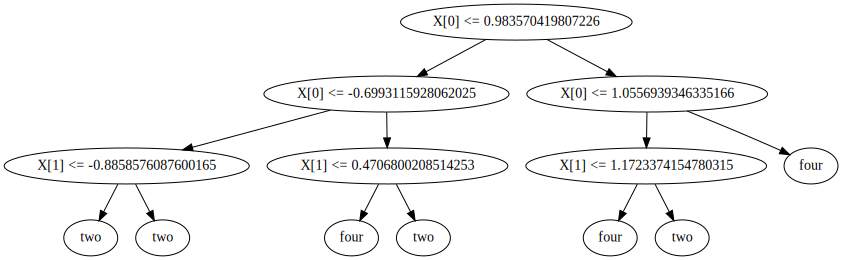

In [26]:
clf = DecisionTree(max_depth=3)
clf.fit(X, y)
# Прогнозируем метки классов на тестовой выборке
y_pred = clf.predict(X)
print(classification_report(y, y_pred))
clf.visualize_tree()